<h1 align="center">Statistics for Machine Learning</h1>
<h2 align="center">Sampling Distributions & Estimators</h2>

&nbsp;

### Overview

Statistical population sizes are usually large, and so taking measurements for each individual can require a lot of time and resources. Sampling provides a way to make estimations for population parameters using a smaller number of measurements. These estimates are called statistics. An estimator is a method for calculating such a statistic, and many estimators can be constructed to approximate different quantities. Some estimators produce statistics more representative of the true population parameters, and some have an element of bias. This notebook introduces the motivation for sampling a distribution and how to conduct a fair sample, as well as covering some commonly used estimators - both biased and unbiased.

### Pre-requisites

This notebook build on topics from previous notebooks, and so it may be useful understand these first:

* *Basic Data Visualisation* - histograms

* *Distributions in Data* - Normal distributions

* *Probability Distributions and Expected Values* - expectation algebra

### Contents

Section 1 - Introduction to Samples

Section 2 - Sampling Distribution of Sample Means

Section 3 - Sampling Distribution of Sample Proportions

Section 4 - Biased and Unbiased Estimators

Section 5 - Conclusion

Section 6 - Glossary

Section 7 - References

### Loading the Data

The SOCR dataset from UCLA contains height and weight information for 25,000 18 year olds, who form the population for this notebook [1].

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
plt.style.use('fivethirtyeight')

In [2]:
df = pd.read_csv('datasets/SOCR-HeightWeight.csv', sep=',')
heights = list(df['Height(Inches)'])
weights = list(df['Weight(Pounds)'])

heights.sort()
weights.sort()

<h2 align="center">Section 1 - Introduction to Samples</h2>

### 1.1 - Motivation for Sampling a Distribution

Understanding the distribution of data in a population can be useful in many ways. For example, understanding the average spending of customers on an online store may be useful when targeting advertisments for luxury products, or finding the average distance between residents and their nearest coffee shop may be useful to determine where to place a new store in a city. Often times however the size of a population is very large, and so taking a measurement for every individual (called a **census**) costs a lot of time and money. For this reason it is useful take a smaller number of measurements from the population, called a **sample**.

The size of the sample is an important design decision for a statistician, and is discussed later in this notebook. For now, the graphic below shows a number of samples for the heights of 18 year olds in a population. The population size, $N$, in this case is 25,000 people. A number of different sample sizes, $n$, are shown. Note how the larger the size of the sample, the more representative the sample is of the population.

&nbsp;


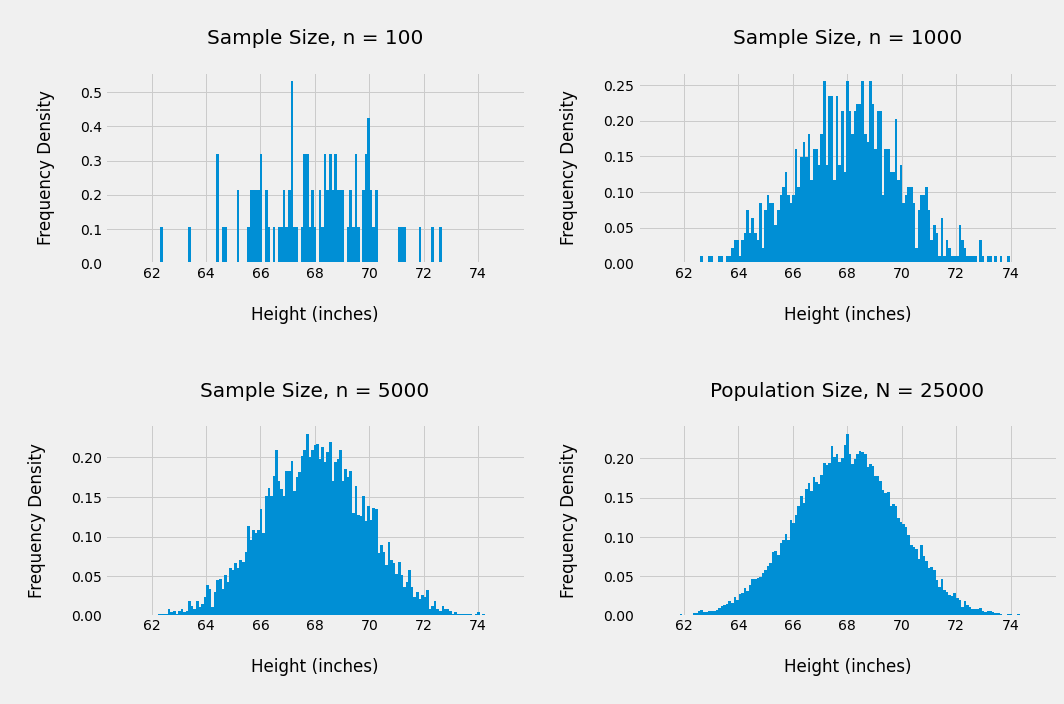

In [52]:
# Plot the graphs
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15,10))

for row, col, n in [(0,0,100), (0,1,1000), (1,0,5000), (1,1,25000)]:
        sample_heights = np.random.choice(heights, size=n, replace=False)
        ax[row][col].hist(sample_heights, bins=np.linspace(61,75,150), density=True)
        ax[row][col].set_xlabel('\nHeight (inches)\n')
        ax[row][col].set_ylabel('\nFrequency Density\n')
        if n == 25000:
            ax[row][col].set_title(f'\nPopulation Size, N = {n}\n', fontsize=20)
        else:
            ax[row][col].set_title(f'\nSample Size, n = {n}\n', fontsize=20)

fig.tight_layout()

### 1.2 - Confusion with the Term *Sample*

The term sample can be confusing as it is often used to refer to two similar things. *Sample* can be used to describe a single measurement of an individual from a population. However, *sample* can also be used to describe the collection of measurements taken from multiple individuals in a population. In other words, one collection of measurements can be called a *sample of samples*. To avoid this confusion, many resources will refer to an observation of a single individual as a *measurement*, and a collection of measurements as a *sample*. These notebooks will abide by this convention. In later notebooks, multiple distinct groups of measurements will be taken from a population, these are then simply referred to as separate *samples* of a population.

&nbsp;


### 1.3 - Conducting a Sample

Samples should be taken in such a way as to represent the population as closely as possible. One way to improve the chance of this is to use **random sampling**. Ensuring that each individual chosen for measurement is random eliminates the risk of bias on the part of the statistician. For example, only sampling members of the public outside a university might skew the results of a study into people's thoughts on higher education. Instead, people could be selected at random from a phone book and contacted. Additionally, there is another consideration of **replacement** - which is the idea that once a measurement is made, the same individual can be measured more than once if randomly selected again. A study conducted in this way is said to be **with replacement**, and one which does not allow multiple measurements from the same person is said to be **without replacement**. An example of a this idea can be shown by sampling the colour of marbles in a bag. With replacement, after each measurement the marble is put back into the bag (replaced) and so there is a possibility the marble will be taken out again. Without replacement, the marble would not be placed back into the bag, but rather put to one side until the sampling has finished. When to use/not use replacement depends on the study, and consideration for this is given later in this notebook.

&nbsp;


### 1.4 - Sample Statistics

**Statistics** are values calculated using a sample from a larger population to estimate a population parameter. Commonly, the mean and proportion of a population are of interest, but any population parameter can be estimated using a statistic. The **population proportion** is the fraction of a population which possess a certain attribute. For example, the proportion of products with a defect, or the proportion of the electorate who voted for candidate A, and so on. Other parameters that can be estimated are included in the table below. Note that population parameters are written using Greek letters, and their statistic counterparts are written using Roman letters. One exception here is the sample proportion $\hat{p}$, which is written with a *hat* to differentiate the symbol from the short-hand for *probability*.

&nbsp;

|      Quantity      | Population Parameter | Sample Statistic |
|:------------------:|:--------------------:|:----------------:|
|        Mean        |         $\mu$        |     $\bar{x}$    |
|     Proportion     |         $\pi$        |     $\hat{p}$    |
|      Variance      |      $\sigma^2$      |       $s^2$      |
| Standard Deviation |       $\sigma$       |        $s$       |
|       Median       |           -          |         -        |

&nbsp;


### 1.5 - Sampling Variability

The code cell earlier in the document takes random samples from the population of heights to plot histograms. If the cell is re-run, a different set of samples will be drawn from the distribution and the shape of the histogram will change slightly. This is due to the **sampling variability**. Out of the 25,000 person population, the first random sample of 100 people will likely not include any of the same 100 people in the second sample. Therefore it follows that any statistic calculated from these samples will be slightly different to eachother. In larger sample sizes, for instance $n = 5000$, the graph will change a lot less since the presence of outliers will have much less of an effect on the sample. This highlights the trade-off for sample size between how representative a sample is, and the cost of collecting the data. Finally, notice that the population histogram does not change, since this is not a sample but the entire collection of data.

&nbsp;


### 1.6 - Sampling Distributions

The histograms above show the relative frequency of people's heights in a single sample. A single sample could be used to calculate a population parameter, but due to the sampling variability the estimate could be very different from the true value for small sample sizes. Instead, multiple samples of the same size ($n$) can be taken from the population, and a statistic can be calculated for each sample. The density curve of the sample statistics can then be plotted visualise their distribution, this is called a **sampling distribution**. If all possible samples of size $n$ are used, the distribution obtained is the true sampling distribution, if any less are used then the resulting distribution is an approximation of the sampling distribution. The statistic calculated from each sample can be any of those given earlier in this notebook, such as the mean and proportion, which give the **sampling distribution of the sample mean** and **sampling distribution of the sample proportion** respectively.

The code below takes 1500 samples of size 10 and calculates the mean for each sample. The sample means are then plot on a frequency histogram to show the sampling distribution of the sample means. This is an approximation for the sampling distribution of sample means for the heights data.

&nbsp;


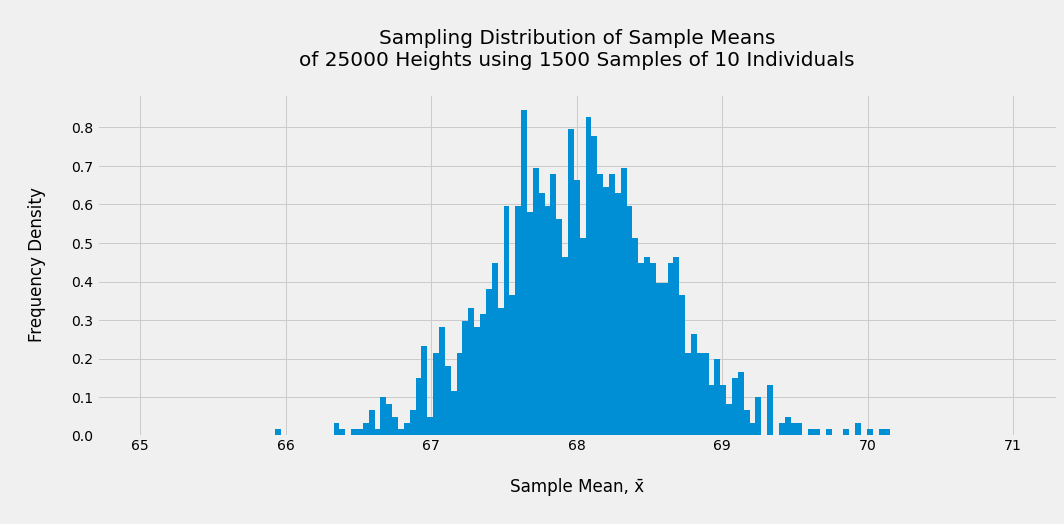

In [53]:
sample_means = [np.mean(np.random.choice(heights, size=10, replace=True)) for i in range(1500)]

fig, ax = plt.subplots(figsize=(15,7.5))
ax.hist(sample_means, bins=np.linspace(65,71,150), density=True)
ax.set_xlabel(u'\nSample Mean, \u0078\u0304\n')
ax.set_ylabel('\nFrequency Density\n')
ax.set_title(f'\nSampling Distribution of Sample Means\nof 25000 Heights using 1500 Samples of 10 Individuals\n',
             fontsize=20)
ax.set_xlim()

fig.tight_layout()

### 1.7 - Central Limit Theorem

The graph above shows the sampling distribution of sample means for 1500 samples of size $n = 10$. This looks very similar to the Normal distribution, and there is a good reason for this. One of the most important concepts in all of statistics is the **Central Limit Theorem**, which states:

> if a population with mean $\mu$ and standard deviation $\sigma$ is sampled sufficiently many times with replacement, the sampling distribution of sample means will approximately be Normally distributed.

This fact allowed for the development of many powerful statistical techniques, since no matter the distribution of a random variable, the distribution of sample means will approximately follow a Normal distribution. This means that the sampling distribution for every random variable can be analysed using the same set of statistical techniques.

&nbsp;


<h2 align="center">Section 2 - Sampling Distribution of Sample Means</h2>

### 2.1 - Effect of Sample Size, $n$, on Sampling Distributions

The sampling distribution shown in the section above used a sample size of 10 individuals to calculate each sample mean. But how can the distribution be expected to change with different sample sizes? A larger sample size will be impacted less by extreme values when calculating the mean, and so each sample mean is likely to be closer to the population mean. It follows that if the average difference between each sample mean and the true mean is less, the spread of the distribution will too be smaller.

The graphs below sampling distributions of sample means for 4 different values of $n$. As the value of $n$ increases, the variance (and therefore standard deviation) decrease.

&nbsp;


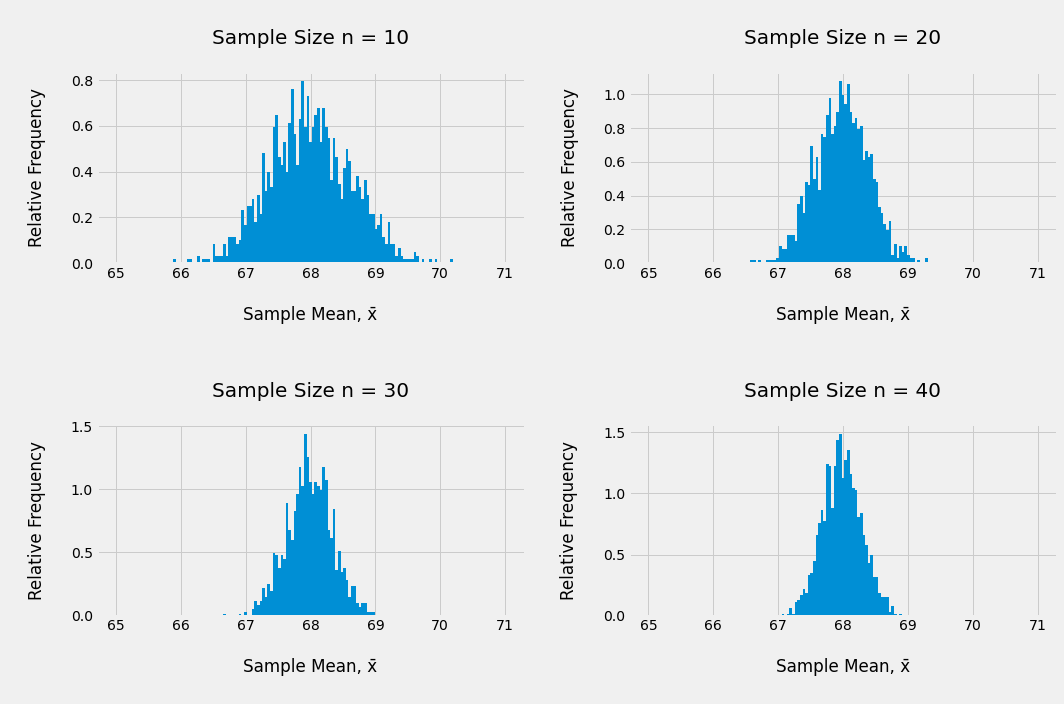

In [170]:
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(15,10))

n = 0
for row in range(2):
    for col in range(2):
        n += 10
        sample_means = [np.mean(np.random.choice(heights, size=n, replace=True)) for i in range(1500)]
        ax[row][col].hist(sample_means, bins=np.linspace(65,71,150), density=True)
        ax[row][col].set_xlabel(u'\nSample Mean, \u0078\u0304\n')
        ax[row][col].set_ylabel('\nRelative Frequency\n')
        ax[row][col].set_title(f'\nSample Size n = {n}\n',
                    fontsize=20)
        ax[row][col].set_xlim()

fig.tight_layout()

### 2.2 - General Properties of the Sampling Distribution of Sample Means

The sampling distribution of sample means can be described by the following set of 4 rules:

* $\mu_{\bar{x}}$ = $\mu$ - the mean of the sampling distribution is the mean of the population.

* $\sigma_{\bar{x}}$ = $\frac{\sigma}{\sqrt{n}}$ - the standard deviation of the sampling distribution is inversely proportional to the square root of the sample size.

* If the population is Normally distributed, the sampling distribution of the sample means is also Normally distributed.

* If the population is not Normally distributed, the Central Limit Theorem states that the sampling distribution of the sample means can be *approximated* by a Normal distribution for large enough sample sizes ($n$ > 30).

&nbsp;


### 2.3 - Proof for the Mean of the Sampling Distribution of Sample Means

One of the general properties above states that the mean of a sampling distribution is equal to the mean of the population that was sampled. This should make intuitive sense, since if enough samples are taken, the average of those samples should tend towards the true mean. The proof for this is shown below:

Consider a random variable $X$ to be governed by a Normal distribution, with a sample mean of $\bar{X}$ determined from randomly chosen samples, $x_1, x_2, ... x_n$ where $n$ is the sample size. The sampling is conducted with replacement to ensure independence between measurements. The steps for determining the mean of the sampling distribution, $\mu_{\bar{X}}$ , are given below. Note the following proof produces good approximations for non-Normally distributed random variables provided the sample size is sufficiently large.


&nbsp;

**Step 1)** Write out the expectation of $\bar{X}$ using expectation algebra. 

Note that $\bar{X}$ is a general sample mean for any sample taken from the population. Each sample is made up of $n$ measurements. Since $\bar{X}$ is a sample mean, it can be written as the sum of each measurement in the sample, divided by the sample size. The expectation of a general sample, $E(\bar{X})$, is the value the sample mean will tend towards after drawing many samples.

&nbsp;

$\begin{align}
\mu_{\bar{X}} = E(\bar{X}) = E\big(\frac{x_1 + x_2 + ... + x_n}{n}\big)
\end{align}$

&nbsp;

**Step 2)** Manipulate the expression further.

The constant $\frac{1}{n}$ can be taken outside of the expectation according to the rules of expectation algebra. The result can then be separated into into a linear combination of multiple expecatations (linearity).

&nbsp;

$\begin{align}
=\frac{1}{n}E(x_1 + x_2 + ... + x_n)
\end{align}$

$\begin{align}
=\frac{1}{n} \big[ E(x_1) + E(x_2) + ... + E(x_n) \big]
\end{align}$

&nbsp;

**Step 3)** Compute the expectations.

Recognise that the expected value of each sample is the mean of the population, $\mu$. This is the case, since on average the value of a measurement will be the mean of the population - this is the definition of the *expected value*. Once the expectations are replaced with the population mean $n$ times, it follows that the sum is equal to $n\mu$.

&nbsp;

$\begin{align}
=\frac{1}{n} \big[ \mu + \mu + ... + \mu \big]
\end{align}$

$\begin{align}
=\frac{1}{n} \big[ n\mu \big]
\end{align}$

&nbsp;

**Step 4)** Simplify and obtain the final result.

&nbsp;

$\begin{align}
\mu_{\bar{X}} = \mu
\end{align}$

&nbsp;


### 2.4 - Proof for the Variance and Standard Deviation of the Sampling Distribution of Sample Means

Another of the general properties above states that the variance of a sampling distribution is inversely proportional to the square root of the sample size. The consequence of this was shown earlier in the notebook, where larger sample sizes had a much smaller spread in their sampling distribution. This result should make sense, since taking larger sample sizes will each give a sample mean closer to the population mean, and so the spread of sample means should be smaller about the true value. The proof for this result is shown below:

Consider again a random variable $X$ to be governed by a Normal distribution, with a sample mean of $\bar{X}$ determined from many independent, randomly chosen samples. Each sample contains $n$ measurements, giving a sample size of $n$. The samples are taken with replacement, so that all samples are independent of each other. The steps for determining the variance, $\sigma_{\bar{X}}^2$, and standard deviation, $\sigma_{\bar{X}}$, of the sampling distribution are given below. Note the following proof produces good approximations for non-Normally distributed random variables provided the sample size is sufficiently large.

&nbsp;

**Step 1)** Write out the variance around the expectation of $\bar{X}$ using expectation algebra. 

Note that $\bar{X}$ is a general sample mean for any sample taken from the population. Each sample is made up of $n$ measurements. Since $\bar{X}$ is a sample mean, it can be written as the sum of each measurement in the sample, divided by the sample size.

&nbsp;

$\begin{align}
\sigma_{\bar{X}}^2 = Var(\bar{X}) = Var\big(\frac{x_1 + x_2 + ... + x_n}{n}\big)
\end{align}$

&nbsp;

**Step 2)** Manipulate the expression further.

The constant $\frac{1}{n}$ can be taken outside according to the rules of expectation algebra. This requires the constant to be squared, and so the expression now features a $\frac{1}{n^2}$ term. The result can then be separated into into a linear combination using the property of linearity.

&nbsp;

$\begin{align}
=\frac{1}{n^2}Var(x_1 + x_2 + ... + x_n)
\end{align}$

$\begin{align}
=\frac{1}{n^2} \big[ Var(x_1) + Var(x_2) + ... + Var(x_n) \big]
\end{align}$

&nbsp;

**Step 3)** Compute the expected values for variance.

Recognise that the expected variance is equal to the variance around the population mean, $\sigma$. Once the value for $\sigma$ has been substituted in, it follows that the sum is equal to $n\sigma$.


&nbsp;

$\begin{align}
=\frac{1}{n^2} \big[ \sigma + \sigma + ... + \sigma \big]
\end{align}$

$\begin{align}
=\frac{1}{n^2} \big[ n\sigma \big]
\end{align}$

&nbsp;

**Step 4)** Simplify the above form to obtain the variance, and take the square root to determine the standard deviation.

&nbsp;

$\begin{align}
\sigma_{\bar{X}}^2 = \frac{\sigma}{n}
\end{align}$

$\begin{align}
\sigma_{\bar{X}} = \frac{\sigma}{\sqrt{n}}
\end{align}$

&nbsp;


### 2.5 - Limitations on Applying the Central Limit Theorem

It was stated earlier in the notebook that for the Central Limit Theorem to apply the sample size $n$ needed to be 'sufficiently large', usually this is taken as $n > 30$. But the actual sample size required depends on the distribution under question. If the distribution being sampled is only slightly skewed form a Normal distribution, then the sample size needed for the Central Limit Theorem to apply is relatively small. For a distribution that is very different to a Normal distribution, then effects of non-Normalness persist in much larger sample sizes. A general rule of thumb is to apply the Central Limit Theorem for when the sample size exceeds 30, but it is important to note that this figure simply comes from statisticians observations and experiences, and is not the result of an elegant proof. It is possible that for some very poorly behaved distributions that $n$ need be much greater than 30, though distributions such as this are very rare in the real world.

The figure below shows a bimodal distribution (blue) for the population of some random variable $X$. 1000 samples are drawn from the population of varying sizes ($n = 5, 10, 30$) to form an approximation for the sampling distribution of sample means. The small sample size $n = 5$ gives a poor approximation of a Normal distribution, since the effects of the bimodal nature of the population cannot be captured with such few measurements. However, as the sample size increases the effects become less and less prevalent, and the sampling distributions give better approximations of a Normal distribution. When $n = 30$ the sampling distribution appears to be well approximated by a Normal distribution, eventhough the original distribution itself was not Normal.

The density curves here were generated using Kernel Density Estimation, which is a technique used to produce smooth density curves from frequency histograms for distributions that are not well-approximated by parameteric means (using equations). This topic is covered futher in the notebook *Kernel Density Estimation*.

&nbsp;

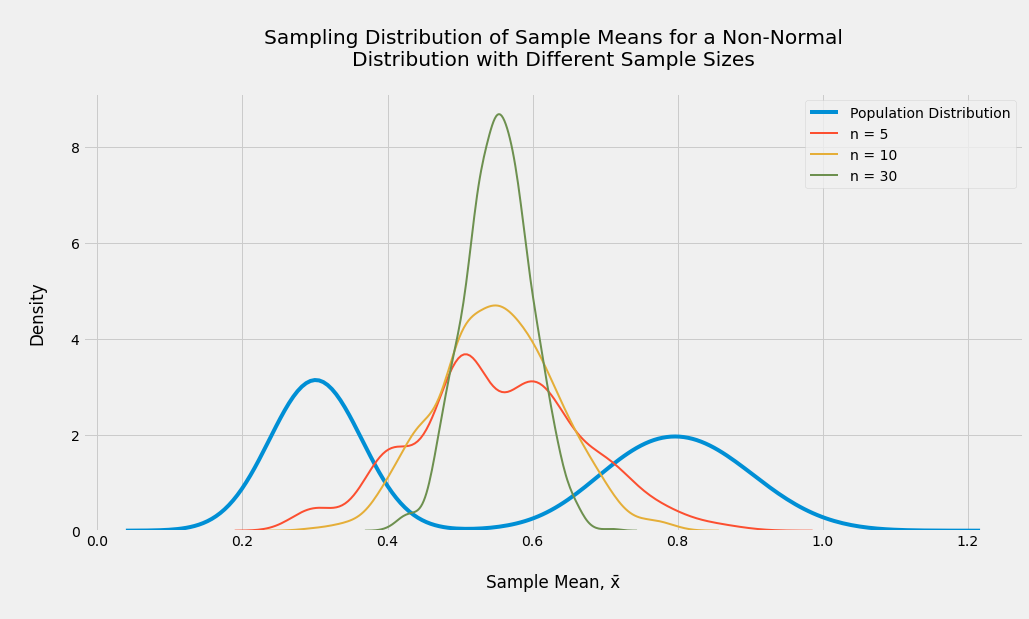

In [182]:
fig, ax = plt.subplots(figsize=(15,7.5))
ax.set_title('\nSampling Distribution of Sample Means for a Non-Normal\nDistribution with Different Sample Sizes\n')
ax.set_ylabel('\nDensity\n')
ax.set_xlabel(u'\nSample Mean, \u0078\u0304\n')

# Generate bimodal distribution
x_1 = np.random.normal(loc=0.8, scale=0.08, size=1000)
x_2 = np.random.normal(loc=0.3, scale=0.03, size=1000)
x = np.concatenate([x_1, x_2])
x.sort()
sns.kdeplot(x, label=f'Population Distribution')

# Sample the distribution with different sample sizes
for n in [5, 10, 30]:
    sample_means = [np.mean(np.random.choice(x, size=n, replace=True)) for i in range(1000)]
    sns.kdeplot(sample_means, label=f'n = {n}', lw=2)

ax.legend()

### 2.6 - Non-Normal Distributions with Small Sample Sizes

The Central Limit Theorem can be used to work with non-Normal distributions if the sample size is large enough. However, up to this point no mention has been made of studying non-Normal distributions in cases where only small samples can be used. In these cases the Normal distribution cannot be used, so instead the *Student's t Distribution* is used. This topic is covered further in *Confidence Intervals & t-Distributions*.

&nbsp;

### 2.6 - Standardising the Sampling Distribution

Recall that a random variable governed by any Normal distribution can be converted to the standard Normal distribution, $Z$, using the following formula:

&nbsp;

$\begin{align}
Z = \frac{x-\mu}{\sigma}
\end{align}$

&nbsp;

This formula can be applied to sampling distributions provided the population distribution of the random variable $X$ is itself Normal, or the sample size is greater than 30:

&nbsp;

$\begin{align}
Z = \frac{\bar{x}-\mu}{\sigma_{\bar{x}}} = \frac{\bar{x}-\mu}{\frac{\sigma}{\sqrt{n}}}
\end{align}$

&nbsp;

This result is revisited in the notebook *Confidence Intervals & t-Distributions*.

&nbsp;


<h2 align="center">Section 3 - Sampling Distribution of Sample Proportions</h2>

### 3.1 - Proportions of Populations and Samples

Sometimes the fraction of a population that possesses a certain characteristic is of interest, this was earlier described as the population proportion, $\pi$. The value of $\pi$ can take any decimal number between 0 and 1 inclusive, where 0 indicates a population where no individual possesses the trait, and 1 indicates a population where every individual possesses the trait. Possession of the trait is called a **success** and is denoted $S$, whereas an individual that does not possess the trait is called a **failure**, which is denoted $F$. The sample proportion, $\hat{p}$, is the fraction of successes measured in a sample, which can be determined by:

&nbsp;

$\begin{align}
\hat{p} = \frac{\text{number of successes}}{\text{sample size, } n}
\end{align}$

&nbsp;

### 3.2 - General Properties of the Sampling Distribution of Sample Proportions

Just as with the sampling distribution of the sample means, the sample proportion can be found for many samples to constuct a sampling distribution. The sampling distribution of sample proportions differs from its sample mean counterpart in that the sample space is discrete. That is, the outcome of a measurement is that an individual either possesses a characteristic or it does not: this means that the population is governed by a binomial distribution.

The sampling distribution of sample proportions can be described by the following set of 3 rules:

* $\mu_{\hat{p}}$ = $\pi$ - the mean of the sampling distribution is the mean of the population.

* $\sigma_{\hat{p}}$ = $\sqrt{\frac{\pi(1-\pi)}{n}}$ - the standard deviation of the sampling distribution is exactly equal to the quantity on the left if the population size is infinite, and is approximately equal if the sample size is large, but does not include more than 10% of the population.

* If the sample size is large and $\pi$ is not close to 0 or 1, the sampling distribution is well-approximated by a Normal distribution (this comes from the properties of Binomial distribution).

&nbsp;


### 3.3 - Proof for the Mean of the Sampling Distribution of Sample Proportions

One of the general properties above states that the mean of a sampling distribution is equal to the mean of the population that was sampled. Note the similarity here between the sample proportion and sample mean. The proof for this result is similar to the proof for the sample mean, and is given below.

Consider a random variable $X$ to represent the number successful individuals to possess a specific characteristic in a randomly selected sample of size $n$, with a probability of success, $p$. The proportion of successes $\hat{p}$ in a sample is governed by a binomial distribution.

&nbsp;

**Step 1)** Write the sample proportion in terms of $X$ and $n$.

Recall that $\hat{p}$ is the proportion of successes in a sample, given by the number of successes $X$ over the size of the sample, $n$. 

&nbsp;

$\begin{align}
\mu_{\hat{p}} = E(\hat{p}) = E\Big(\frac{X}{n}\Big) 
\end{align}$

&nbsp;

**Step 2)** Manipulate the expression using expectation algebra.

Expectations multiplied by constants can freely move the constant inside or outside the expectation.

&nbsp;

$\begin{align}
= \frac{1}{n}E(X)
\end{align}$

&nbsp;

**Step 3)** Recall the expected value for a biomially distributed variable.

The expected value for a binomially distributed variable is equal to the product of the number of trials, $n$, and the probability of success, $p$. Substiting this result and simplifying gives the rule stated above.


$\begin{align}
= \frac{1}{n}np
\end{align}$

$\begin{align}
\mu_{\hat{p}} = p
\end{align}$

&nbsp;


### 3.4 - Proof for the Variance and Standard Deviation of the Sampling Distribution of Sample Proportions

The general properties above also state a result for the standard deviation (and therefore variance) of the sampling distribution that can be proven using the properties of a binomial distribution.

Consider a random variable $X$ to represent the number successful individuals to possess a specific characteristic in a randomly selected sample of size $n$, with a probability of success, $p$. The proportion of successes $\hat{p}$ in a sample is governed by a binomial distribution.

&nbsp;

**Step 1)** Write the sample proportion in terms of $X$ and $n$.

Recall that $\hat{p}$ is the proportion of successes in a sample, given by the number of successes $X$ over the size of the sample, $n$. 

&nbsp;

$\begin{align}
\sigma_{\hat{p}}^2 = Var(\hat{p}) = Var\Big(\frac{X}{n}\Big) 
\end{align}$

&nbsp;

**Step 2)** Manipulate the expression using expectation algebra.

The variance around an expectation has a quadratic relationship, and so the variance of a random variable multipled by a constanst requires the constant to be squared if taken outside of the $Var$ term.

&nbsp;

$\begin{align}
= \frac{1}{n^2}Var(X)
\end{align}$

&nbsp;

**Step 3)** Recall the variation around an expected value for a biomially distributed variable.

The variation around an expected value for a binomially distributed variable is equal to the product of the number of trials, $n$, the probability of success, $p$, and the probability of failure, $(1-p)$. In this case, the probability of success is $\pi$, since this is the chance of drawing a success from the population. Substiting this result and simplifying gives the rule stated above.

&nbsp;

$\begin{align}
= \frac{1}{n^2}\big(n\pi(1-\pi)\big)
\end{align}$

$\begin{align}
= \frac{n\pi(1-\pi)}{n^2}
\end{align}$

$\begin{align}
= \frac{\pi(1-\pi)}{n}
\end{align}$

$\begin{align}
\sigma_{\hat{p}}^2 = \frac{\pi(1-\pi)}{n}
\end{align}$

$\begin{align}
\sigma_{\hat{p}} = \sqrt{\frac{\pi(1-\pi)}{n}}
\end{align}$

&nbsp;


### 3.5 - Limits on Approximating the Sampling Distribution with a Normal Distribution

For the theory above to apply there are a few conditions that must be satisfied:

* Samples must be randomly selected
* $n\hat{p} \geq 10$
* $n(1-\hat{p}) \geq 10$
* $n < 0.1N$

Firstly, the sample proportions must be calculated from samples that have been randomly selected. This removes any bias that could be introduced when taking measurements. Secondly, the sample size should be large enough so that the statistics generated are representative of the population. However if the sample size is too large, the samples are less and less independent since there are fewer individuals to select without replacement. For this reason, a rule-of-thumb has been developed which states that if $n\hat{p} \geq 10$ and $n(1-\hat{p}) \geq 10$ both true, then the sample size is appropriately sized. Finally, this idea is extended with another heuristic which states the sample size should be limited to 10% of the population size to ensure independence between samples.

&nbsp;

<h2 align="center">Section 4 - Biased and Unbiased Estimators</h2>

### 4.1 - Estimators and Statistics

As mentioned earlier the term *statistic* is used to describe any value calculated from a sample of a population. Sample statistics are used to estimate the value of population parameters, and so the methods used to calculate them are called **estimators**. The two main types of estimates that can be calculated from a sample:

* Point estimates - a single value, used to estimate a population parameter
* Interval estimates - a range of values, used to give a plausible region that a population parameter is likely to exist within

This notebook will focus on point estimates, with interval estimates covered in *Confidence Intervals & t-Distributions*.

&nbsp;


### 4.2 - Bias in Statistics

Some statistics provide better estimates for population parameters than others. For example, it is quite easy to see that calculating the range of each sample is likely to give a terrible prediction for the variance of a population. While both quantities give a measure of spread, the sample range is only dependent upon two values, and so is significantly affected by outliers.

A statistic whose expected value is equal to the value of the population parameter being estimated is said to be an **unbiased statistic**. A statistic whose expected value is anything other than the desired population parameter is said to be a **biased statistic**. It is important to understand which statistics are biased, and if possible, how they can be corrected to produced an unbiased estimate of the desired population parameters.

&nbsp;

### 4.3 - Point Estimates

A point estimate is a single value that calculated to form an estimate of a population parameter, such as the population mean, $\mu$, and population proportion, $\pi$. A brief overview of some possible estimators to calculate these statistics is given below:

&nbsp;

**Estimators for the Population Mean, $\mu$:**

The population mean can be estimated in a few different ways, with each method having its own benefits and drawbacks. These methods include:

* Sample mean, $\bar{x} = \frac{\sum  \limits _{i=1}^{n} x_i}{n}$
* Sample median
* Trimmed sample mean

Due to the Central Limit theorem, the sample mean will tend to $\mu$ after many trials and so is an unbiased estimator, For this reason it is the most common choice for estimating the population mean. Unlike the sample mean, the sample median is not guarenteed to tend towards the mean after many samples if the distribution is not symmetric. Hence, the sample median is a biased estimator for non-symmetric distributions. Because of this, the sample median is rarely chosen to estimate the population mean (except in rare cases such as usage with the Laplace 'Double Exponential' distribution, but this is beyond the scope of this notebook). Finally, the trimmed sample mean is an unbiased estimator, provided an equal number of measurements are trimmed for both extremes of each sample.

&nbsp;

**Estimators for the Population Proportion, $\pi$:**

Unlike the population mean, the population proportion is usually only estimated in a single way:

* Sample proportion, $\hat{p} = \frac{\text{number of successes in the sample}}{\text{sample size, } n}$

&nbsp;

### 4.4 - Choosing a Sample Statistic

As shown above, some quantities have many possible choices for which estimator to use when calculating a sample statistic. In general an estimator should be chosen according to the following rule:

> an unbiased estimator with the smallest standard deviation should be chosen to calculate the sample statistic

Applying this rule to common scenarios for the sample mean gives the following guidelines:

* If the population is Normally distributed, the sample mean $\bar{x}$ is the optimal choice since it will give the lowest variance. However, the trimmed sample mean will perform almost as well.

* For populations with symmetric distributions but heavier tails when compared to a Normal distribution, the trimmed mean may be a better choice

* The sample median is best reserved for the Laplace (double exponential) distribution

### 4.5 - Sample Variance as a Biased Statistic

The sample mean is an unbiased statistic, since the Central Limit Theorem states that the mean of the sampling distribution of sample means tends towards the population mean. However, this is not true for the sample variance and so a correction factor must be used. This correction factor is called **Bessel's Correction** and is named after Friedrich Bessel. The following cells aim to provide some intuition for why this correction is needed, and display a mathematical proof for deriving the correction itself. For now, it is useful to see the form of the corrected and uncorrected formula for variance.

&nbsp;

**Population Variance (uncorrected)**

When the population mean is known, no correction is necessary. For this reason, this form of the variance is called the population variance, and is the form first introduced in the notebook *Introduction to Statistics*. The population variance is a true measure of population spread, and is given the Greek symbol, $\sigma$. This formula should not be used to estimate the population variance using a sample.

&nbsp;

$\begin{align}
\sigma^2  = \frac{\sum  \limits _{i=1}^{N} (x_i - \mu)^2}{N}
\end{align}$

&nbsp;

**Sample Variance (corrected)**

When the population mean is unknown a correction is required, hence the formula below. The denominator in the sample variance is $n-1$ rather than $n$, which accounts for the fact that the sample variance *understimates* the population variance. The factor of $\frac{1}{n-1}$ is Bessel's correction. This is proved mathematically in the following cells, but the intuition can be understood at a high level. If the population mean is unknown, the sample mean is used instead as an estimate, but the sample mean may be quite different than the population mean for any particular sample. This means that the difference between each point in the sample and the sample mean will be smaller than each point in the sample and the population mean. Recall that the mean of a set of values is the point that minimises the distance between itself and each of values. For this reason, the sample variance will report a spread that is smaller than the true spread of the population in every case where the sample mean is not exactly equal to the population mean. The sample variance is an estimation of population spread, and is given the Roman letter, $s^2$.

&nbsp;

$\begin{align}
s^2  = \frac{\sum  \limits _{i=1}^{n} (x_i - \bar{x})^2}{n-1}
\end{align}$

&nbsp;

### 4.6 - Visualing Bessel's Correction

To highlight the idea of the sample mean always reporting a smaller spread than the population mean, a series of graphs have been plotted below. A number of points with $x$-coordinates 1, 2, 3, 6 and 8 have been added to some number lines using blue circles. These represent a sample of measurements taken from a population. The sum of the squared differences (numerator of the variance) between each measurement and a green circle is calculated for 3 different green points, $v$, with $x$-coordinates 0, 4 and 9. The sample mean of the green points is 4 and is coloured in red. Since the red circle is the mean of the sample, the sum of the squared difference between each point and the red circle is minimised.

At the bottom of the figure is a smooth curve, representing the sum of square differences between each of the points and different values of $v$. The graphs are aligned so that it is easier to see where each number line fits on to the graph. The population mean can reasonably be anywhere on this line, and has been marked on in orange. The population mean in this example happens to be 5, which is one unit higher than the sample mean of 4. It does not matter exactly what the value of the population mean is, rather that the sum of the squared differences will always be underestimated if the population mean is not exactly equal to the sample mean. This is shown by the sample mean sitting at the minimum point of the error curve, and all other values of $v$ falling higher up the curve.

Here is a summarised explanation for emphasis:

> the sample variance will always underestimate the population variance if the sample mean is not exactly equal to the population mean, because the sample mean is the value that minimises its difference between itself and the measurements, which means the population mean will always be a greater distance away on average from the measurements.

&nbsp;

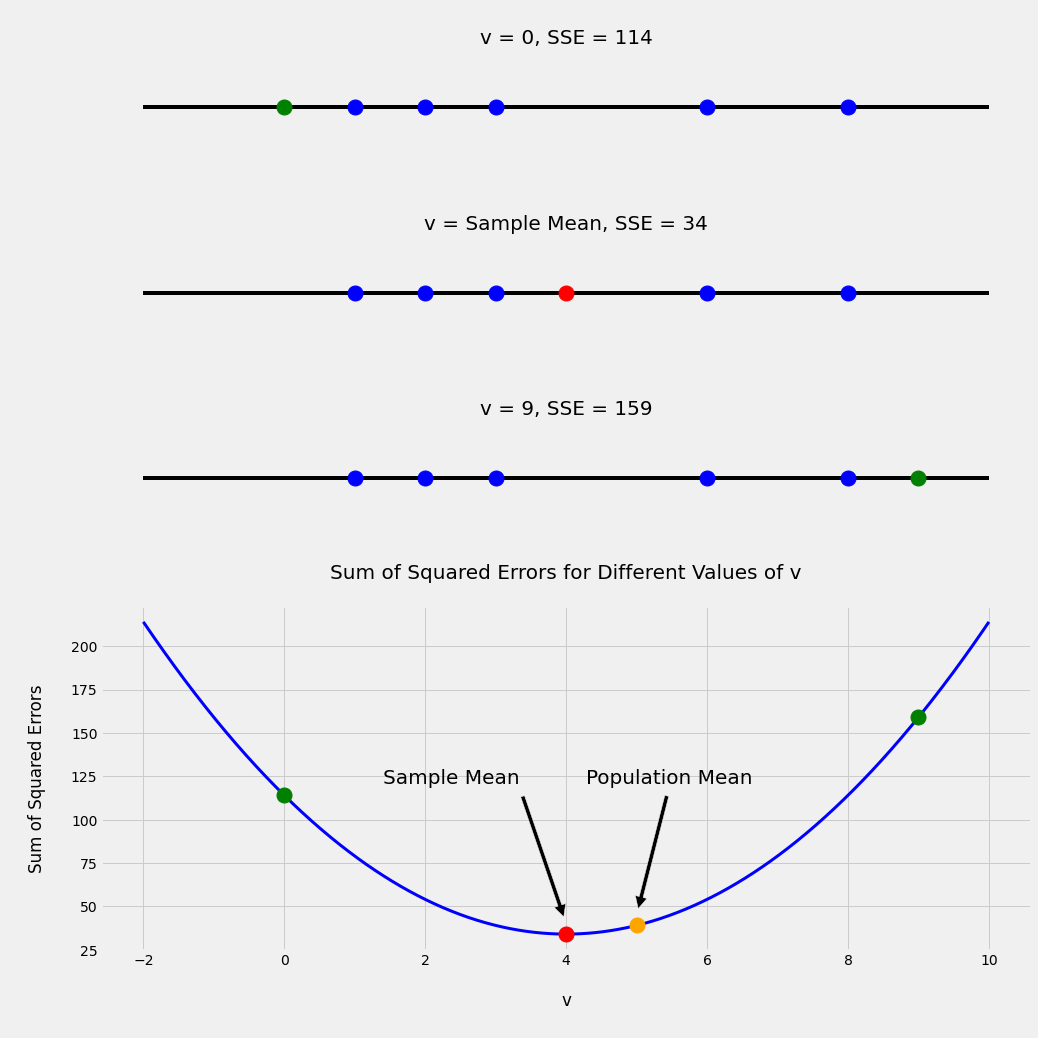

In [225]:
def SSE(values, point):
    return sum([(value-point)**2 for value in values])

fig, ax = plt.subplots(nrows=4, figsize=(15,15), gridspec_kw={'height_ratios': [1,1,1,3]})

# Plot the number lines
sample_points = [(1,0), (2,0), (3,0), (6,0), (8,0)]
sample_x = [x for x,y in sample_points]
point_x = [0, 4, 9]

for i in range(3):
    
    ax[i].hlines(0, -2, 10, color='black')
    ax[i].axis('off')

    if point_x[i] == 4:
        ax[i].set_title(f'\nv = Sample Mean, SSE = {SSE(sample_x, point_x[i])}', fontsize=20)
        ax[i].plot(point_x[i], 0, 'o', markersize = 15, mfc = 'r', mec='r', zorder=4)
    else:
        ax[i].set_title(f'\nv = {point_x[i]}, SSE = {SSE(sample_x, point_x[i])}', fontsize=20)
        ax[i].plot(point_x[i], 0, 'o', markersize = 15, mfc = 'g', mec='g', zorder=4)

    for p in sample_points:
        ax[i].plot(p[0], p[1], 'o', markersize = 15, mfc = 'b', mec='b')


# Plot the error curve
v = np.linspace(-2, 10, 1000)

ax[3].set_title('Sum of Squared Errors for Different Values of v\n', fontsize=20)
ax[3].set_xlabel('\nv\n')
ax[3].set_ylabel('\nSum of Squared Errors\n')
ax[3].plot(v, SSE(sample_x, v), c='b', lw=3)
ax[3].plot(np.mean(sample_x), SSE(sample_x, np.mean(sample_x)), c='r', marker='o', markersize=15, lw=3)
ax[3].plot(5, SSE(sample_x, 5), c='orange', marker='o', markersize=15, lw=3)
ax[3].plot(0, SSE(sample_x, 0), c='g', marker='o', markersize=15, lw=3)
ax[3].plot(9, SSE(sample_x, 9), c='g', marker='o', markersize=15, lw=3)

ax[3].annotate('Sample Mean', xy=(4, 40), xycoords='data', xytext=(0.45, 0.5), fontsize=20, textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.05), horizontalalignment='right', verticalalignment='center')

ax[3].annotate('Population Mean', xy=(5, 45),xycoords='data',xytext=(0.7, 0.5), fontsize=20,textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.05),horizontalalignment='right',verticalalignment='center')

fig.tight_layout(pad=2)

### 4.7 - Proof that the Sample Mean always gives the Smallest Sum of Square Differences

The value of $v$ was shown in the graphical representation above to give the smallest sum of squared differences when it was equal to the sample mean. The following proof will use a general value of $v$ and proof this mathematically.

&nbsp;

**Step 1)** Write the variance equation using a variable number $v$ instead of the population mean.

The sum of squared differences shown in the graph is the numerator of the variance equation, and so $(x_i-v)^2$ represents the equation of the curve.

&nbsp;

$\begin{align}
\frac{\sum \limits_{i=1}^{n}(x_i-v)^2}{n}
\end{align}$

&nbsp;

**Step 2)** Differentiate the variance equation.

Differentiating the variance equation will give the gradient of the curve (multipled by $\frac{1}{n}$), and so this expression can be set to 0 to solve for the minimum point. The minimum point is the value of $v$ that causes the smallest sum of squared differences, and therefore the smallest variance.

&nbsp;

$\begin{align}
\frac{d}{dv} \frac{\sum \limits_{i=1}^{n}(x_i-v)^2}{n} = 0
\end{align}$

&nbsp;

**Step 3)** Rearrange the equation and solve.

&nbsp;

$\begin{align}
\frac{\sum \limits_{i=1}^{n}-2(x_i-v)}{n} = 0
\end{align}$

&nbsp;

$\begin{align}
-2 \times \frac{\sum \limits_{i=1}^{n}(x_i-v)}{n} = 0
\end{align}$

&nbsp;

$\begin{align}
\frac{\sum \limits_{i=1}^{n}(x_i-v)}{n} = 0
\end{align}$

&nbsp;

$\begin{align}
\frac{\sum \limits_{i=1}^{n}(x_i)}{n} + \frac{\sum \limits_{i=1}^{n}(-v)}{n}= 0
\end{align}$

&nbsp;

**Step 4)** Recognise the first term is the sample mean and the second term is simply $v$.

The first term is the sum of all values of $x$ in the sample, divided by the sample size - which is the definition for the sample mean. The second term is the sum of $v$, $n$ times, divided by $n$. This simplifies to $\frac{nv}{n} = v$.

&nbsp;

$\begin{align}
\frac{\sum \limits_{i=1}^{n}(x_i)}{n} - \frac{\sum \limits_{i=1}^{n}(v)}{n}= 0
\end{align}$

&nbsp;

$\begin{align}
\bar{x} - v = 0
\end{align}$

&nbsp;

**Step 5)** Rearrange to obtain the final result.

Taking the negative $v$ to the right hand side confirms the result presented in the graphical representation. This proves that the sample mean $\bar{x}$ is the value that gives the minimum possible spread, and so if the population mean is any value other than the sample mean, the sample variance will report a variance smaller than the true variance.

&nbsp;

$\begin{align}
v = \bar{x}
\end{align}$

&nbsp;

### 4.8 - Proof that Dividing by $n-1$ Corrects the Sample Variance

The previous proof showed that using the sample mean to calculate the variance will always underestimate the population variance. The proof below determines the correction factor that is required to account for this underestimation. This proof is valid as long as the samples drawn are **independent and identically distributed** (IID).

&nbsp;

**Step 1)** Write the equation for the sample variance.

Recall that the equation for the sample variance uses the sample mean, $\bar{x}$, since the population mean is unknown.

&nbsp;

$\begin{align}
s^2 = \frac{1}{n} \sum_{i=1}^{n} (x_i - \bar{x})^2
\end{align}$

&nbsp;

**Step 2)** Take expectations and expand the right-hand side.

Compute the expression for the squared terms and take the expectation. The property of linearity can be used to separate the expression into a linear combination of simpler terms.

&nbsp;

$\begin{align}
E[s^2] = E\Big[\frac{1}{n} \sum_{i=1}^{n} (x_i - \bar{x})^2\Big]
\end{align}$

$\begin{align}
= E\Big[\frac{1}{n} \sum_{i=1}^{n} (x_i^2 - 2 x_i \bar{x} + \bar{x}^2) \Big]
\end{align}$

$\begin{align}
= E\Big[\frac{1}{n} \sum_{i=1}^{n} x_i^2 - 2 \bar{x} \frac{1}{n} \sum_{i=1}^{n} x_i + \frac{1}{n} \sum_{i=1}^{n} \bar{x}^2 \Big]
\end{align}$

$\begin{align}
= E\Big[\frac{1}{n} \sum_{i=1}^{n} x_i^2\Big] - 2 E\Big[\bar{x} \frac{1}{n} \sum_{i=1}^{n} x_i\Big] + \frac{1}{n} E\Big[\sum_{i=1}^{n} \bar{x}^2 \Big]
\end{align}$

&nbsp;

**Step 3)** Simplify the first term and substitute it back into the equation

The factor of $\frac{1}{n}$ can be taken outside the expectation in the first term using the rules of expectation algebra and the expectation can be taken inside the summation.

&nbsp;

$\begin{align}
\frac{1}{n} E\Big[ \sum_{i=1}^{n} x_i^2\Big]
\end{align}$

$\begin{align}
= \frac{1}{n} \Big(\sum_{i=1}^{n} E[x_i^2]\Big)
\end{align}$

$\begin{align}
= \frac{1}{n} \Big(n E[x_i^2]\Big)
\end{align}$

$\begin{align}
= E[x_i^2]
\end{align}$

&nbsp;

**Step 4)** Simplify the second and third terms then combine.

The summation in the second term gives the sum of each value of $x$ in the sample, divided by the sample size. This is simply the sample mean, and so the second term can be replaced with $2E(\bar{x}^2)$. Similarly, the third term is the expectation of the $\bar{x}^2$ and can be replaced with $E(\bar{x}^2)$. This simplifies to the following:

&nbsp;

$\begin{align}
= E[x_i^2] - 2E\big[\bar{x}^2\big] + E\big[\bar{x}^2 \big]
\end{align}$

$\begin{align}
= E[x_i^2] - E\big[\bar{x}^2 \big]
\end{align}$

&nbsp;


**Step 5)** Find an expression for $E[x_i^2]$ in terms of $\sigma$ and $\mu$.

The variance of a population was proven to take the following form in *Introduction to Statistics*:

&nbsp;

$\begin{align}
Var(X) = \frac{\sum  \limits _{i=1}^{N} (x_i)^2}{N} - \frac{\sum  \limits _{i=1}^{N} (x)^2}{N}
\end{align}$

&nbsp;

Using expectation notation, this can be rewritten as:

&nbsp;

$\begin{align}
\text{Var}(X) = E[X^2] - E[X]^2
\end{align}$

&nbsp;

The expression can be manipulated as follows:

&nbsp;

$\begin{align}
\text{Var}(X) = E[X^2] - E[X]^2
\end{align}$

$\begin{align}
E[X^2] = \text{Var}(X) + E[X]^2
\end{align}$

&nbsp;

The expected variance of the population is $\sigma^2$ and the expected value of $X$ is $\mu$, which gives:

&nbsp;

$\begin{align}
E[X^2] = \sigma^2 + \mu^2
\end{align}$

&nbsp;

This can be compared to the result for the sample variance, and so $E[x_i^2]$ can be replaced with $\sigma^2 + \mu^2$, giving:

&nbsp;

$\begin{align}
E(s^2) = \sigma^2 + \mu^2 - E\big[\bar{x}^2 \big]
\end{align}$


**Step 6)** Find an expression for $E[\bar{x}^2]$ in terms of $\sigma$ and $\mu$.

The alternative form of the variance equation can be used again to find an expression for $E[X^2]$:

&nbsp;

$\begin{align}
\text{Var}(X) = E[X^2] - E[X]^2
\end{align}$

$\begin{align}
E[X^2] = \text{Var}(X) + E[X]^2
\end{align}$

&nbsp;

This term is analogous to $E[\bar{x}^2]$ in the sample variance equation. To the equation above can be made more similar by replacing each instance of $X$ with $\bar{X}$:

&nbsp;

$\begin{align}
E[\bar{x}^2] = \text{Var}(\bar{x}) + E[\bar{x}]^2
\end{align}$

&nbsp;

Recall that the variance of the sampling distribution of sample means, $\text{Var}(\bar{X})$, is $\frac{\sigma^2}{n}$ from earlier in this notebook, and note that the expected value of $\bar{x}$ is simply the population mean (from the Central Limit Theorem). This gives the following result:

&nbsp;

$\begin{align}
E[\bar{x}^2] = \frac{\sigma^2}{n} + \mu^2
\end{align}$

&nbsp;


**Step 7)** Combine the above results and simplify.

With expressions for $E[x_i^2]$ and $E[\bar{x}^2]$ found, the expected value of the sample variance can be written as follows:

&nbsp;

$\begin{align}
E(s^2) = \sigma^2 + \mu^2 - \Big(\frac{\sigma^2}{n} + \mu^2\Big)
\end{align}$

$\begin{align}
E(s^2) = \sigma^2 \Big(1 - \frac{1}{n}\Big)
\end{align}$

$\begin{align}
E(s^2) = \sigma^2 \Big(\frac{n-1}{n}\Big)
\end{align}$

&nbsp;

**Step 8)** Solve for the correction factor.

The result above shows the the expected value of the sample variance is not equal to the population variance, and hence the sample variance has been shown to be a biased statistic. To produce an unbiased statistic, the factor of $(\frac{n-1}{n})$ must be corrected by multiplying the sample variance the inverse of the bias term, $(\frac{n}{n-1})$.

&nbsp;

$\begin{align}
s_{corrected}^2 = (\frac{n}{n-1}) \times \frac{1}{n} \sum_{i=1}^{n} (x_i - \bar{x})^2
\end{align}$

$\begin{align}
= (\frac{1}{n-1}) \sum_{i=1}^{n} (x_i - \bar{x})^2
\end{align}$

$\begin{align}
= \frac{\sum_{i=1}^{n} (x_i - \bar{x})^2}{n-1}
\end{align}$

&nbsp;

This gives the formula stated earlier in the notebook.

&nbsp;


### 4.9 - Sample Standard Deviation as a Biased Estimator

Although the sample variance can be corrected to become an unbiased statistic, it is important to note that taking the square root of this estimator does not give an unbiased estimator for the standard deviation. Despite this, the square root is often used as a good approximation for the population standard deviation.

&nbsp;


<h2 align="center">Section 5 - Conclusion</h2>

This notebook introduced sampling a distribution, and the motivations for estimating population parameters using a small subset of measurements. The formulae needed for this were also shown, including the correction needed for the sample variance, which was later derived. These equations are very useful in the field of statistics, and are applied much more often than those for calculating population parameters, since census data for an entire population is rarely available.

&nbsp;


<h2 align="center">Section 6 - Glossary</h2>

**Bessel's Correction**
> The factor used to correct the bias of the sample variance and sample standard distribution (note that standard distribution is not fully corrected with this method).

**Biased Statistic**
> A statistic whose expected value is not equal to the value of the population parameter being estimated.

**Census**
> The collection of measurements taken from every individual of a population.

**Central Limit Theorem**
> A theorem that states if a population with mean $\mu$ and standard deviation $\sigma$ is sampled sufficiently many times with replacement, the sampling distribution of sample means will approximately be Normally distributed.

**Estimator**
> A method used to calculate a statistic from a sample.

**Failure**
> An individual that does not possess the characteristic of interest in a proportion study.

**Independent and Identically Distributed** 
> Variables, samples etc whose value(s) do not depend on eachother, and are governed by the same distribution.

**Population Proportion**
> The fraction of a population which possess a certain attribute, for example the proportion of products with a defect.

**Random Sampling**
> Taking a sample by randomly selecting individuals to measure from a population.

**Replacement**
> The idea that once a measurement is made for a sample, the same individual can be measured more than once if randomly selected again.

**Sample**
> A smaller number of measurements taken from a population, often taken when a census is too resource-intensive to collect.

**Sampling Distribution**
> A density curve of a sample statistics created from all possible samples of a population.

**Sampling Distribution of Sample Means**
> A sampling distribution where the statistic calculated is the sample mean.

**Sampling Distribution of Sample Proportions**
> A sampling distribution where the statistic calculated is the sample proportion.

**Sampling Variability**
> The variation in individuals selected to form samples from a population.

**Statistic**
> A value calculated using a sample from a larger population to estimate a population parameter. 

**Success**
> An individual that possesses the characteristic of interest in a proportion study.

**Unbiased Statistic**
> A statistic whose expected value is equal to the value of the population parameter being estimated.

**With Replacement**
> A study conducted using replacement.

**Without Replacement**
> A study conducted not using replacement.

<h2 align="center">Section 7 - Further Reading</h2>

[1] SOCR Heights and Weights Dataset - [Kaggle](https://www.kaggle.com/datasets/burnoutminer/heights-and-weights-dataset)